In [1]:
import os
import random 
from glob import glob 
import numpy as np 
import matplotlib.pyplot as plt 
from tqdm.notebook import tqdm 
import json
import pandas as pd
from scipy.stats import norm

from poreUtils import *


In [2]:
# Directory where the scans are stored with results 
root_dir = 'D:\sagar\Data'

In [3]:
# Getting the scans where pypore3d analysis has been run 
scans = []
for p in os.listdir(root_dir):
    file_path = os.path.join(root_dir, p, 'porespy')
    if os.path.exists(file_path):
        scans.append(p)

In [4]:
# geting the group information
df = pd.read_csv('study_group.csv')
df

,Identification,Group,ImgBL,ImgVILI,Sample,Scan
0,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z0.0mm
1,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z3.3mm
2,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z6.6mm
3,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z9.9mm
4,Rat1,Con-VILI,1,1,MD_1264_A1,MD_1264_A1_1_Z13.2mm
...,...,...,...,...,...,...
72,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z0.0mm
73,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z3.3mm
74,Rat9,Ble-VILI,1,1,MD_1264_B9,MD_1264_B9_Z6.6mm
75,Rat10,Con-VILI,1,1,MD_1264_B10,MD_1264_B10_Z0.0mm


In [5]:
# creating diffrent groupsfrom the available scans
scan_groups = {}
for g in np.unique(df['Group']):
    scan_groups[g] = []

for scan in scans:
    scan_index = df.loc[df['Scan'] == str(scan)].index[0]
    group = df['Group'][scan_index]
    scan_groups[group].append(scan)

print(scan_groups)

{'Ble': ['MD_1264_A11_Z3.3mm_corr_phrt', 'MD_1264_A18', 'MD_1264_A3_1_Z0.0mm', 'MD_1264_A3_1_Z3.3mm', 'MD_1264_A3_1_Z6.6mm', 'MD_1264_A3_1_Z9.9mm', 'MD_1264_A6_1_Z3.3mm_corr_phrt', 'MD_1264_B3_1_Z3.3mm'], 'Ble-VILI': ['MD_1264_A12_Z3.3mm_corr_phrt', 'MD_1264_A2_1_Z3.3mm', 'MD_1264_A5_1_Z0.0mm_corr_phrt', 'MD_1264_A8_1_Z3.3mm_corr_phrt', 'MD_1264_A9_Z0.0mm_Z3.3mm', 'MD_1264_B2_1', 'MD_1264_B5_1_Z3.3mm', 'MD_1264_B9_Z3.3mm'], 'Con-VILI': ['MD_1264_A10_Z6.6mm', 'MD_1264_A13_1_Z3.3mm_corr_phrt', 'MD_1264_A16_Z3.3mm_corr_phrt', 'MD_1264_A1_1_Z3.3mm', 'MD_1264_A4_1_Z0.0mm_Z0.0mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z3.3mm_corr_phrt', 'MD_1264_A4_1_Z0.0mm_Z6.6mm_corr_phrt', 'MD_1264_B10_Z3.3mm', 'MD_1264_B4_1_Z3.3mm']}


In [75]:
def data_distribution_plots(scan_group_dict, scan_rootPath, scan_regx, feature):
    parameter_per_group = []
    for key in scan_group_dict.keys():
        json_files = []
        for aFile in scan_group_dict[key]:
            fpath = os.path.join(scan_rootPath, aFile, 'porespy')
            json_files += glob(fpath + '\*' +scan_regx + '.json')
        
        parameter = []
        for json_file in json_files:
            file = open(json_file)
            data = json.load(file)
            file.close()
            extract_feature = data[feature]

            #
            # do what we want to plot for exampe, blob volume
            #
            # property_to_append = len(extract_feature) # Number of blobs 

            parameter += extract_feature  
            # if len(extract_feature) > 0:
            #     parameter.append(np.median(extract_feature))
        
        parameter_per_group.append([key, parameter])    

    # Create a figure and axis object
    fig, ax = plt.subplots()

    # Create the boxplot
    ax.boxplot([x[1] for x in parameter_per_group])

    # Add labels and a title to the plot
    ax.set_xlabel('study Groups', size=15)
    ax.set_ylabel('data distribution', size=15)
    ax.set_title(('boxplot of ' + feature + ' with ' + scan_regx), size=15)
    ax.set_xticklabels([x[0] for x in parameter_per_group])
    ax.tick_params(axis='both', which='major', labelsize=15)

    # Display the plot
    plt.show()


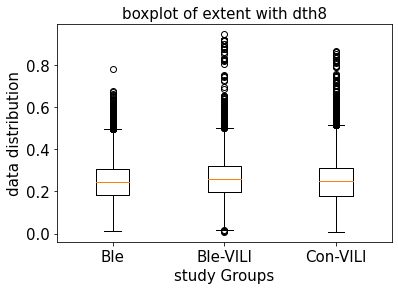

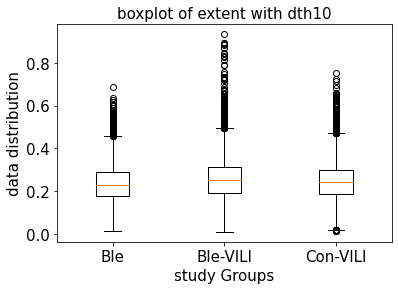

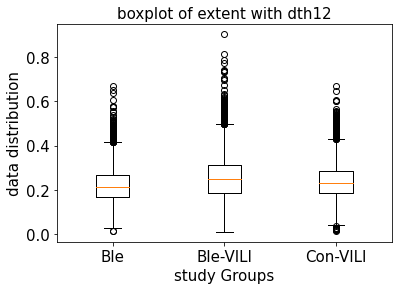

In [76]:
seed_threshold = ['dth8', 'dth10', 'dth12']
for seed in seed_threshold:
    data_distribution_plots(scan_groups, root_dir, seed, 'extent')

In [77]:
def data_distribution_plots_per_seed(list_of_seed, scan_group_dict, scan_rootPath, feature):
    parameter_per_group_per_seed = []
    for seed in list_of_seed:
        parameter_per_group = []
        for key in scan_group_dict.keys():
            json_files = []
            for aFile in scan_group_dict[key]:
                fpath = os.path.join(scan_rootPath, aFile, 'porespy')
                json_files += glob(fpath + '\*' + seed + '.json')
            
            parameter = []
            for json_file in json_files:
                file = open(json_file)
                data = json.load(file)
                file.close()
                extract_feature = data[feature]

                #
                # do what we want to plot for exampe, blob volume
                #
                # property_to_append = len(extract_feature) # Number of blobs 
                parameter += extract_feature
                # if len(extract_feature) > 0:
                #     parameter.append(np.median(extract_feature))
            
            parameter_per_group.append([key, parameter])
        
        parameter_per_group_per_seed.append([seed, parameter_per_group])


    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(16,9))    
    xticks = []
    xticklabels = []   
    for i, aSeedData in enumerate(parameter_per_group_per_seed):

        for j, gr_of_seed in enumerate(aSeedData[1]):
            grp = gr_of_seed[0]
            data = gr_of_seed[1]
            ax.boxplot(data, positions=[i+j*4], widths=0.6)
            
            xticks.append(i+j*4)
            if aSeedData[0] == 'dth10':
                xticklabels.append(aSeedData[0]+ '\n' + grp)
            else:
                xticklabels.append(aSeedData[0])



            
    ax.set_xticklabels(xticklabels)
    ax.set_xticks(xticks)
    ax.tick_params(axis='both', which='major', labelsize=20)


    plt.show()

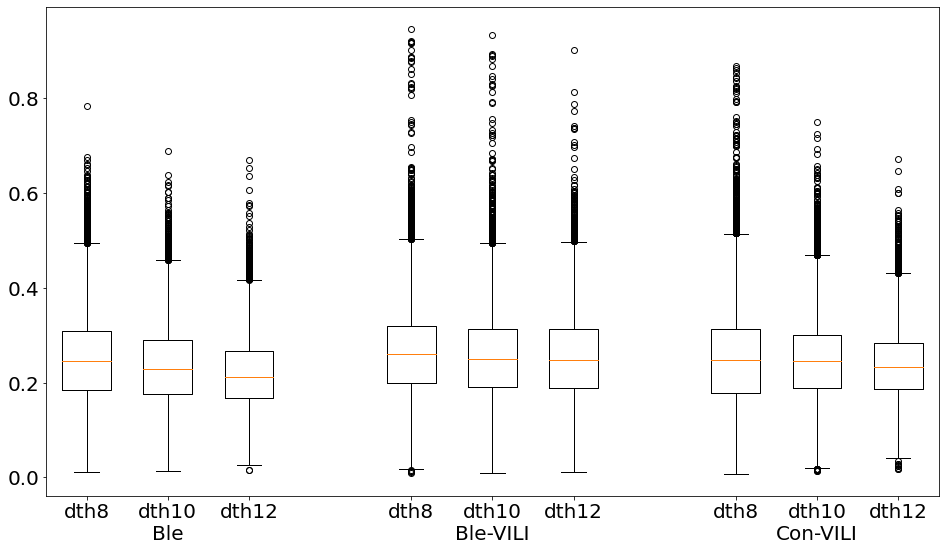

In [78]:
seed_threshold = ['dth8', 'dth10', 'dth12']
data_distribution_plots_per_seed(seed_threshold, scan_groups, root_dir, 'extent')

In [79]:
def data_distribution_plots_per_seed2(list_of_seed, scan_group_dict, scan_rootPath, feature):
    parameter_per_group_per_seed = []
    for seed in list_of_seed:
        parameter_per_group = []
        for key in scan_group_dict.keys():
            json_files = []
            for aFile in scan_group_dict[key]:
                fpath = os.path.join(scan_rootPath, aFile, 'porespy')
                json_files += glob(fpath + '\*' + seed + '.json')
            
            parameter = []
            for json_file in json_files:
                file = open(json_file)
                data = json.load(file)
                file.close()
                extract_feature = data[feature]

                #
                # do what we want to plot for exampe, blob volume
                #
                # property_to_append = len(extract_feature) # Number of blobs 
                parameter += extract_feature
                # if len(extract_feature) > 0:
                #     parameter.append(np.median(extract_feature))
            
            parameter_per_group.append([key, parameter])
        
        parameter_per_group_per_seed.append([seed, parameter_per_group])


    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(16,9))    
    xticks = []
    xticklabels = []   
    for i, aSeedData in enumerate(parameter_per_group_per_seed):

        for j, gr_of_seed in enumerate(aSeedData[1]):
            grp = gr_of_seed[0]
            data = gr_of_seed[1]
            ax.boxplot(data, positions=[i*4+j], widths=0.6)
            
            xticks.append(i*4+j)
            if grp == 'Ble-VILI':
                xticklabels.append(grp+'\n'+aSeedData[0])
        
            else:
                xticklabels.append(grp)



            
    ax.set_xticklabels(xticklabels)
    ax.set_xticks(xticks)
    ax.tick_params(axis='both', which='major', labelsize=20)


    plt.show()

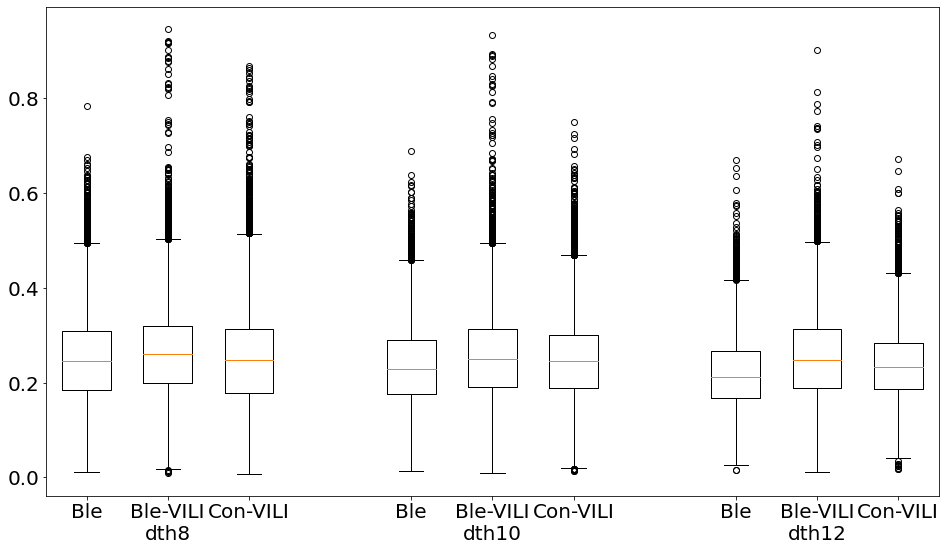

In [80]:
seed_threshold = ['dth8', 'dth10', 'dth12']
data_distribution_plots_per_seed2(seed_threshold, scan_groups, root_dir, 'extent')

In [ ]:
# box plot suggestion from Lorenzo 
# statanotations.Anotator

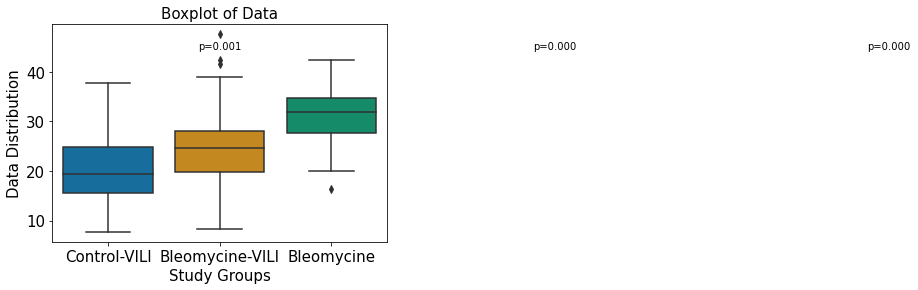

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Generate some example data
control_vili = np.random.normal(loc=20, scale=5, size=50)
bleomycine_vili = np.random.normal(loc=25, scale=7, size=50)
bleomycine = np.random.normal(loc=30, scale=6, size=50)
data = [control_vili, bleomycine_vili, bleomycine]
labels = ['control-vili', 'bleomycine-vili', 'bleomycine']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot using seaborn
sns.boxplot(data=data, ax=ax, palette='colorblind')

# Add labels and a title to the plot
ax.set_xlabel('Study Groups', size=15)
ax.set_ylabel('Data Distribution', size=15)
ax.set_title('Boxplot of Data', size=15)
ax.set_xticklabels(['Control-VILI', 'Bleomycine-VILI', 'Bleomycine'])
ax.tick_params(axis='both', which='major', labelsize=15)
# Add annotations for statistical tests
p_val_threshold = 0.05

# Perform a t-test between control_vili and bleomycine_vili
p_val_cv_bv = ttest_ind(control_vili, bleomycine_vili, equal_var=False).pvalue
if p_val_cv_bv < p_val_threshold:
    ax.text(0.5, 0.9, f'p={p_val_cv_bv:.3f}', ha='center', va='center', transform=ax.transAxes)

# Perform a t-test between control_vili and bleomycine
p_val_cv_b = ttest_ind(control_vili, bleomycine, equal_var=False).pvalue
if p_val_cv_b < p_val_threshold:
    ax.text(1.5, 0.9, f'p={p_val_cv_b:.3f}', ha='center', va='center', transform=ax.transAxes)

# Perform a t-test between bleomycine_vili and bleomycine
p_val_bv_b = ttest_ind(bleomycine_vili, bleomycine, equal_var=False).pvalue
if p_val_bv_b < p_val_threshold:
    ax.text(2.5, 0.9, f'p={p_val_bv_b:.3f}', ha='center', va='center', transform=ax.transAxes)

# Display the plot
plt.show()

TypeError: __init__() missing 1 required positional argument: 'pairs'

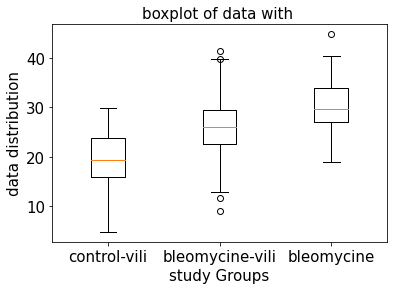

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statannotations.Annotator import Annotator
from scipy.stats import ttest_ind

# Generate some example data
control_vili = np.random.normal(loc=20, scale=5, size=50)
bleomycine_vili = np.random.normal(loc=25, scale=7, size=50)
bleomycine = np.random.normal(loc=30, scale=6, size=50)
data = [control_vili, bleomycine_vili, bleomycine]
labels = ['control-vili', 'bleomycine-vili', 'bleomycine']

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the boxplot
ax.boxplot(data)

# Add labels and a title to the plot
ax.set_xlabel('study Groups', size=15)
ax.set_ylabel('data distribution', size=15)
ax.set_title(('boxplot of data with '), size=15)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=15)

# Add annotations for statistical tests
annot = Annotator(ax)
p_val_threshold = 0.05

# Perform a t-test between control_vili and bleomycine_vili
p_val_cv_bv = ttest_ind(control_vili, bleomycine_vili, equal_var=False).pvalue
annot.add_stat_annotation(ax, box_pairs=[('control-vili', 'bleomycine-vili')],
                          pvalue=p_val_cv_bv, pvalue_threshold=p_val_threshold, test='t-test')

# Perform a t-test between control_vili and bleomycine
p_val_cv_b = ttest_ind(control_vili, bleomycine, equal_var=False).pvalue
annot.add_stat_annotation(ax, box_pairs=[('control-vili', 'bleomycine')],
                          pvalue=p_val_cv_b, pvalue_threshold=p_val_threshold, test='t-test')

# Perform a t-test between bleomycine_vili and bleomycine
p_val_bv_b = ttest_ind(bleomycine_vili, bleomycine, equal_var=False).pvalue
annot.add_stat_annotation(ax, box_pairs=[('bleomycine-vili', 'bleomycine')],
                          pvalue=p_val_bv_b, pvalue_threshold=p_val_threshold, test='t-test')

# Display the plot
plt.show()
